In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [3]:
stockStartDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')
df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [4]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,66.398476,13.227143,352.369232
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
...,...,...,...,...,...
2020-06-30,227.070007,2758.820068,364.799988,455.040009,1413.609985
2020-07-01,237.550003,2878.699951,364.109985,485.640015,1438.040039
2020-07-02,233.419998,2890.300049,364.109985,476.890015,1464.699951


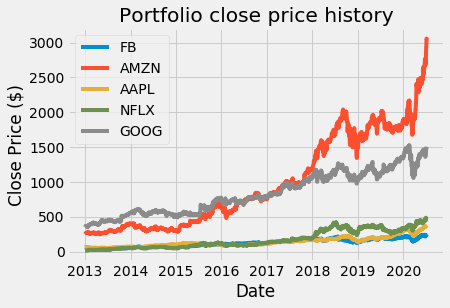

In [6]:
title = 'Portfolio close price history'
my_stocks = df
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.show()

In [7]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031682,-0.006264,0.022435
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
...,...,...,...,...,...
2020-06-30,0.029143,0.029265,0.008348,0.017440,0.013362
2020-07-01,0.046153,0.043453,-0.001891,0.067247,0.017282
2020-07-02,-0.017386,0.004030,0.000000,-0.018017,0.018539


In [8]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117278,0.052524,0.041417,0.054692,0.049346
AMZN,0.052524,0.091871,0.035937,0.061391,0.046669
AAPL,0.041417,0.035937,0.076627,0.032039,0.037685
NFLX,0.054692,0.061391,0.032039,0.212130,0.048871
GOOG,0.049346,0.046669,0.037685,0.048871,0.065085


In [10]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05936531157452801

In [11]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24364997757957627

In [12]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3627451601367172

In [14]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+ percent_vols)
print('Annual variance : '+ percent_var)

Expected annual return : 36.0%
Annual volatility/standard deviation/risk : 24.0%
Annual variance : 6.0%


In [15]:
pip install PyPortfolioOpt

     |████████████████████████████████| 48 kB 410 kB/s eta 0:00:011
     |████████████████████████████████| 746 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 851 kB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 1.7 MB/s eta 0:00:01
  Created wheel for multiprocess: filename=multiprocess-0.70.10-py3-none-any.whl size=108187 sha256=9db21f052a62b9251b898040dae1026f113873b4cfc35cd6269eb10b4e16509e
  Stored in directory: /Users/aryaanmehra/Library/Caches/pip/wheels/69/a0/aa/14379d16112299afa0b5f8464971648ea2a660a8f6aa1ca088
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp37-cp37m-macosx_10_9_x86_64.whl size=84465 sha256=f05f74fa6cb67751a896e0a961c07084791975aaea664cd00cbec5fc020b59f0
  Stored in directory: /Users/aryaanmehra/Library/Caches/pip/wheels/70/e7/fd/4a4f957fc18a0f0407ca4b331c51e6a469c92efec58f732edf
  

In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [17]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.13993), ('AMZN', 0.32012), ('AAPL', 0.22624), ('NFLX', 0.31371), ('GOOG', 0.0)])
Expected annual return: 41.5%
Annual volatility: 26.6%
Sharpe Ratio: 1.49


(0.41544359903070527, 0.26593745126668983, 1.4869797283051454)

In [19]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'FB': 4.0, 'AMZN': 2.0, 'AAPL': 9.0, 'NFLX': 9.0}
Funds Remaining: $81.20
